In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from datetime import datetime 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_squared_error,precision_score
from sklearn.metrics import f1_score, accuracy_score
import shap
pd.options.display.max_columns = 999

In [3]:
from sklearn.metrics import recall_score


In [4]:
df = pd.read_csv('CaseLog_070223.csv')

In [5]:
df.shape

(34214, 54)

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
df.columns

Index(['Number_of_episodes', 'Length_of_stay',
       'Time_hospitalized_for_cancer_episodes',
       'Time_hospitalized_for_cardiovascular',
       'Time_hospitalized_for_dementia', 'Time_hospitalized_for_Diabetes',
       'Time_hospitalized_for_explicit_sepsis',
       'Time_hospitalized_for_Immune_system',
       'Time_hospitalized_for_implicit_sepsis',
       'Time_hospitalized_for_infection',
       'Time_hospitalized_for_Kidney_dialysis', 'Time_hospitalized_for_Liver',
       'Time_hospitalized_for_Lung', 'Time_hospitalized_for_Other',
       'poly_clinic_visits', 'admissions_count', 'daycare_count',
       'inpatient_count', 'avg_time_in_between', 'Length_of_history',
       'time_to_previous_episode', 'time_between_last_2last',
       'severity_2ndlast', 'visit_type_2ndlast', 'LOS_2ndLast',
       'time_between_2last_3last', 'severity_3rdlast', 'visit_type_3rdlast',
       'LOS_3rdLast', 'Number_explicit_sepsis_episodes',
       'Number_infection_episodes', 'Number_implicit_sep

In [9]:
df_medinfo = df[['Number_of_episodes', 'Length_of_stay',
       'Time_hospitalized_for_cancer_episodes',
       'Time_hospitalized_for_cardiovascular',
       'Time_hospitalized_for_dementia', 'Time_hospitalized_for_Diabetes',
       'Time_hospitalized_for_explicit_sepsis',
       'Time_hospitalized_for_Immune_system',
       'Time_hospitalized_for_implicit_sepsis',
       'Time_hospitalized_for_infection',
       'Time_hospitalized_for_Kidney_dialysis', 'Time_hospitalized_for_Liver',
       'Time_hospitalized_for_Lung', 'Time_hospitalized_for_Other',
       'poly_clinic_visits', 'admissions_count', 'daycare_count',
       'inpatient_count', 'avg_time_in_between', 'Length_of_history',
       'time_to_previous_episode', 'time_between_last_2last',
       'severity_2ndlast', 'visit_type_2ndlast', 'LOS_2ndLast',
       'time_between_2last_3last', 'severity_3rdlast', 'visit_type_3rdlast',
       'LOS_3rdLast', 'Number_explicit_sepsis_episodes',
       'Number_infection_episodes', 'Number_implicit_sepsis_episodes',
       'Number_Diabetes_episodes', 'Number_Cardiovascular_episodes',
       'Number_Cancer_episodes', 'Time_hospitalized_for_Lung.1',
       'Time_hospitalized_for_Demetia', 'Kidney_dialysis_flag',
       'Time_hospitalized_for_Liver.1', 'age_at_first_visit', 'age_at_last_visit', 'Time_under_acute_admission', 'Survived']].copy()

In [10]:
df_medinfo.columns

Index(['Number_of_episodes', 'Length_of_stay',
       'Time_hospitalized_for_cancer_episodes',
       'Time_hospitalized_for_cardiovascular',
       'Time_hospitalized_for_dementia', 'Time_hospitalized_for_Diabetes',
       'Time_hospitalized_for_explicit_sepsis',
       'Time_hospitalized_for_Immune_system',
       'Time_hospitalized_for_implicit_sepsis',
       'Time_hospitalized_for_infection',
       'Time_hospitalized_for_Kidney_dialysis', 'Time_hospitalized_for_Liver',
       'Time_hospitalized_for_Lung', 'Time_hospitalized_for_Other',
       'poly_clinic_visits', 'admissions_count', 'daycare_count',
       'inpatient_count', 'avg_time_in_between', 'Length_of_history',
       'time_to_previous_episode', 'time_between_last_2last',
       'severity_2ndlast', 'visit_type_2ndlast', 'LOS_2ndLast',
       'time_between_2last_3last', 'severity_3rdlast', 'visit_type_3rdlast',
       'LOS_3rdLast', 'Number_explicit_sepsis_episodes',
       'Number_infection_episodes', 'Number_implicit_sep

In [12]:
grp = ['alive', 'implicit_death<30', 'explicit_death<30', 'infection_death<30', 'death<30']
df_sepsis = df_medinfo.loc[df_medinfo['Survived'].isin(grp)]
df_sepsis.Survived[df_sepsis.Survived == 'alive'] = 1
df_sepsis.Survived[df_sepsis.Survived == 'implicit_death<30'] = 0
df_sepsis.Survived[df_sepsis.Survived == 'explicit_death<30'] = 0
df_sepsis.Survived[df_sepsis.Survived == 'infection_death<30'] = 0
df_sepsis.Survived[df_sepsis.Survived == 'death<30'] = 0


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [13]:
df_sepsis.columns

Index(['Number_of_episodes', 'Length_of_stay',
       'Time_hospitalized_for_cancer_episodes',
       'Time_hospitalized_for_cardiovascular',
       'Time_hospitalized_for_dementia', 'Time_hospitalized_for_Diabetes',
       'Time_hospitalized_for_explicit_sepsis',
       'Time_hospitalized_for_Immune_system',
       'Time_hospitalized_for_implicit_sepsis',
       'Time_hospitalized_for_infection',
       'Time_hospitalized_for_Kidney_dialysis', 'Time_hospitalized_for_Liver',
       'Time_hospitalized_for_Lung', 'Time_hospitalized_for_Other',
       'poly_clinic_visits', 'admissions_count', 'daycare_count',
       'inpatient_count', 'avg_time_in_between', 'Length_of_history',
       'time_to_previous_episode', 'time_between_last_2last',
       'severity_2ndlast', 'visit_type_2ndlast', 'LOS_2ndLast',
       'time_between_2last_3last', 'severity_3rdlast', 'visit_type_3rdlast',
       'LOS_3rdLast', 'Number_explicit_sepsis_episodes',
       'Number_infection_episodes', 'Number_implicit_sep

In [14]:
df_sepsis['control'] = 3


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [102]:
df_sepsis.Survived.value_counts()

1    22637
0     7294
Name: Survived, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
Y = df_sepsis['Survived'].values
Y = Y.astype('int')
X = df_sepsis.drop('Survived', axis=1)

In [17]:
feature_names = np.array(X.columns)

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [20]:
oversample = SMOTE()
SMOTE_X_train, SMOTE_Y_train = oversample.fit_resample(X_train, Y_train)

In [21]:
X_train.shape

(23944, 43)

In [22]:
SMOTE_X_train.shape

(36222, 43)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(SMOTE_X_train, SMOTE_Y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

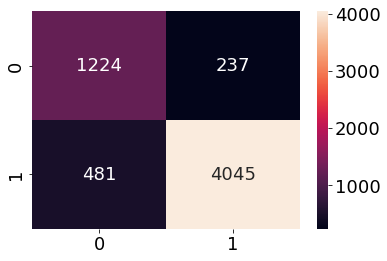

In [92]:
prediction_test = model.predict(X_test)
C_rf = confusion_matrix(Y_test, prediction_test)
sns.heatmap(C_rf, annot=True, fmt='g')
plt.show()

In [93]:
from sklearn import metrics

In [94]:
print("Accuracy = ", metrics.accuracy_score(Y_test, prediction_test))

Accuracy =  0.880073492567229


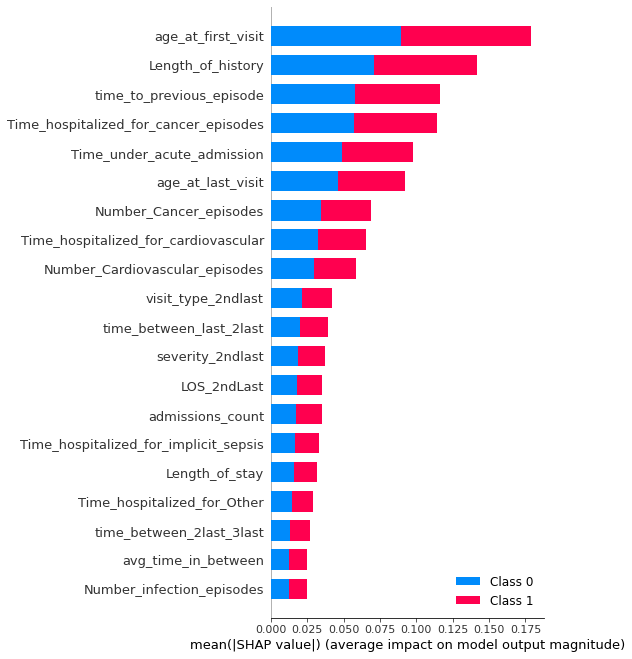

In [100]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)


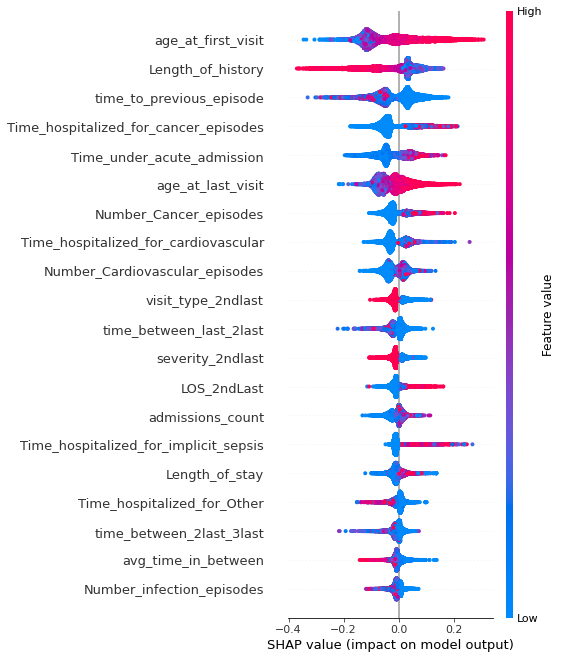

In [96]:
shap.summary_plot(shap_values[0], X_train, plot_type='dot', show = False, feature_names=feature_names)
plt.savefig("MEDINFO_shapRFdot.png")

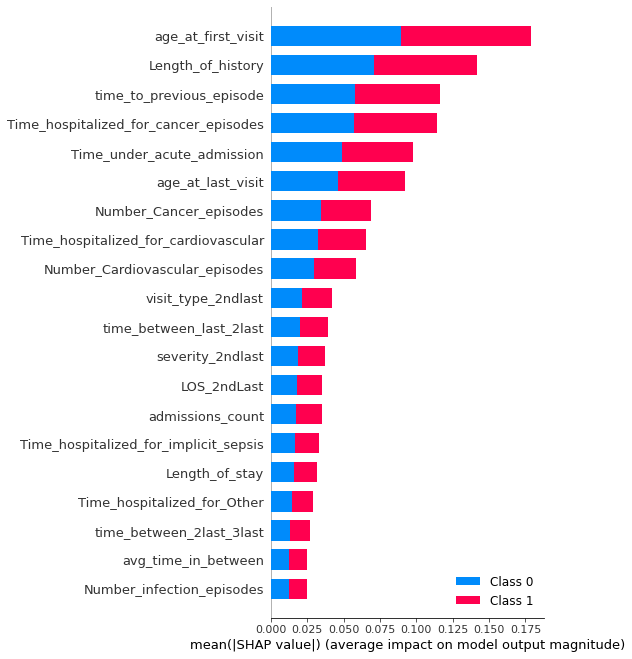

<Figure size 432x288 with 0 Axes>

In [99]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)
plt.savefig("MEDINFO_shap_rf.png")

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators = 10, random_state=30)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=30)

In [27]:
prediction_test = model.predict(X_test)

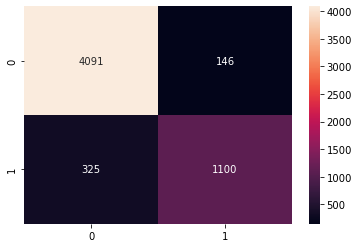

In [28]:
prediction_test = model.predict(X_test)

C_rf = confusion_matrix(Y_test, prediction_test)
sns.heatmap(C_rf, annot=True, fmt='g')
plt.show()

In [29]:
from sklearn import metrics

In [30]:
print("Accuracy = ", metrics.accuracy_score(Y_test, prediction_test))

Accuracy =  0.9168138466972802


In [31]:
print(f"F1 Score {f1_score(Y_test, prediction_test, average='macro')}")

F1 Score 0.8846147805378493


In [32]:
print("score on test: " + str(model.score(X_test, Y_test)))

score on test: 0.9168138466972802


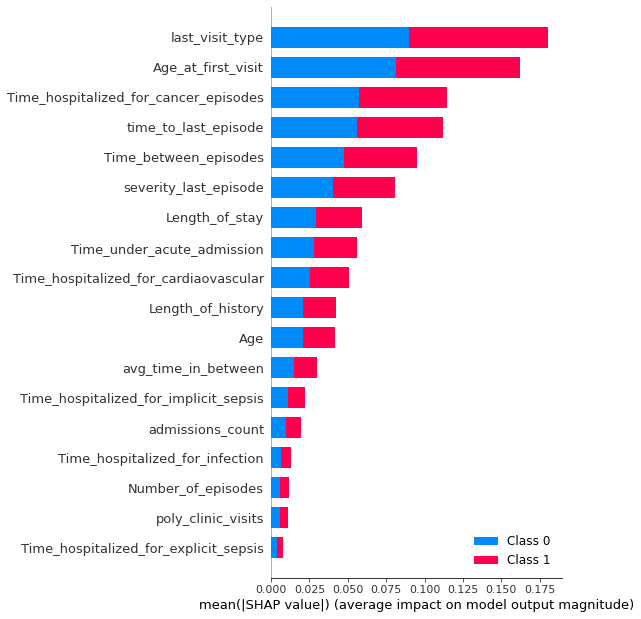

In [33]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

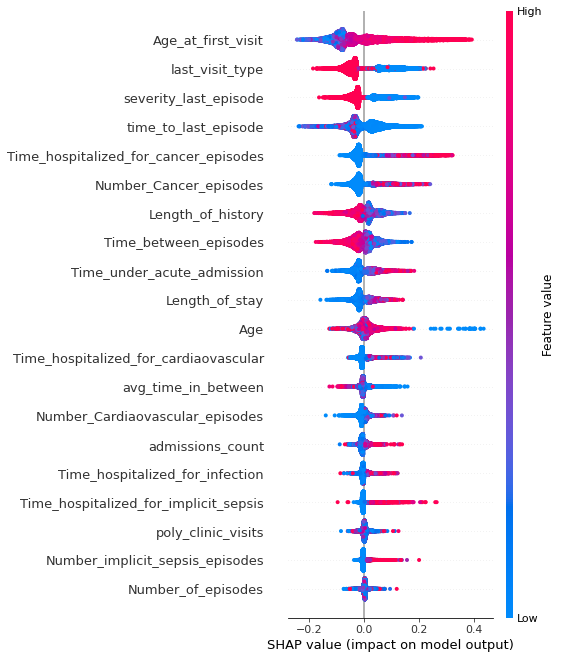

In [192]:
shap.summary_plot(shap_values[0], X_train, plot_type='dot', show = False, feature_names=feature_names)

In [128]:
explainer = shap.TreeExplainer(model)
shap_values2 = explainer.shap_values(X_test)


In [133]:
shap_obj = explainer(X_test)
shap.plots.beeswarm(shap_obj)


ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [121]:

# Calculate shapley values for test data
start_index = 7
end_index = 8
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]
print(shap_values[0].shape)

(1, 23)


In [122]:
# %% >> Visualize local predictions
shap.initjs()

In [123]:
prediction = model.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")

The RF predicted: 1


In [124]:
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

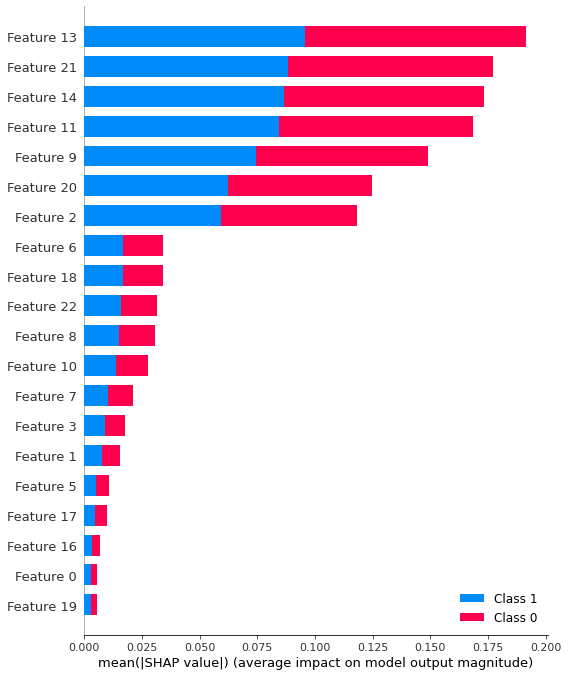

In [125]:
shap.summary_plot(shap_values, X_test)

In [52]:
explainer = shap.TreeExplainer(model)
# Calculate shapley values for test data

shap_values = explainer.shap_values(X_test)

In [54]:
rf_resultX = pd.DataFrame(shap_values[0], columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance.head()

,col_name,feature_importance_vals
36,age_at_first_visit,0.067434
23,visit_type_last,0.059199
22,severity_last,0.044926
21,time_to_last,0.043426
2,Cancer,0.039198


In [99]:
feature_imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
print(feature_imp)

age_at_first_visit      0.137844
visit_type_last         0.082905
Cancer_flag             0.063153
LOS                     0.061493
Length_of_history       0.059519
implicit_flag           0.059438
Implicit sepsis         0.057847
total_time_between      0.057762
age                     0.056102
time_under_akutt        0.053906
time_to_last            0.052251
severity_last           0.038301
Cancer                  0.037354
avg_time_in_between     0.030404
Explicit Sepsis         0.027992
explicit_flag           0.022301
admission_count         0.017640
Infection               0.016137
Cardiaovascular         0.015886
visit_count             0.014810
entry_count             0.013930
Cardiaovascular_flag    0.013449
infection_flag          0.009578
dtype: float64


In [264]:
Features = pd.DataFrame({'features':feature_imp.index, 'importance':feature_imp.values})

In [265]:
Features

,features,importance
0,Implicit sepsis,0.077681
1,explicit_flag,0.077097
2,implicit_flag,0.068708
3,age_at_first_visit,0.062920
4,visit_type_last,0.059284
5,Explicit Sepsis,0.047746
6,time_under_akutt,0.045710
7,total_time_between,0.044880
8,severity_last,0.038631
9,time_to_last,0.037130


Other Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(SMOTE_X_train, SMOTE_Y_train)

print("score on test: " + str(lr.score(X_test, Y_test)))

score on test: 0.8830800066811425


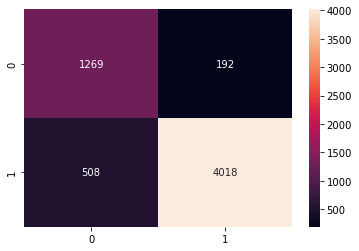

In [32]:
prediction_test_lr = lr.predict(X_test)

C_lr = confusion_matrix(Y_test, prediction_test_lr)
sns.heatmap(C_lr, annot=True, fmt='g')
plt.show()

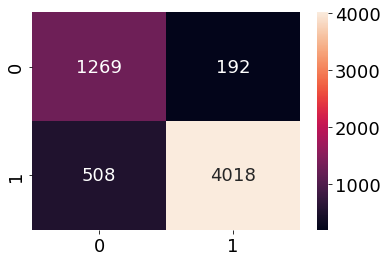

In [103]:
C_lr = confusion_matrix(Y_test, prediction_test_lr)
sns.heatmap(C_lr, annot=True, fmt='g')
plt.show()

In [34]:
total1=sum(sum(C_lr))
#####from confusion matrix calculate accuracy
accuracy1=(C_lr[0,0]+C_lr[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_lr[0,0]/(C_lr[0,0]+C_lr[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_lr[1,1]/(C_lr[1,0]+C_lr[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_lr, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_lr, average='macro')}")


Accuracy :  0.8830800066811425
Sensitivity :  0.8685831622176592
Specificity :  0.8877596111356606
Recall score : 0.8685831622176592
F1 Score 0.8518444829825311


In [35]:
shap_values = shap.TreeExplainer(lr).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(SMOTE_X_train, SMOTE_Y_train)

print("score on test: " + str(gnb.score(X_test, Y_test)))

score on test: 0.8237848672122933


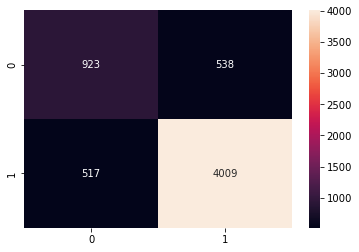

In [37]:
prediction_test_gnb = gnb.predict(X_test)

C_gnb = confusion_matrix(Y_test, prediction_test_gnb)
sns.heatmap(C_gnb, annot=True, fmt='g')
plt.show()

In [38]:
total1=sum(sum(C_gnb))
#####from confusion matrix calculate accuracy
accuracy1=(C_gnb[0,0]+C_gnb[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_gnb[0,0]/(C_gnb[0,0]+C_gnb[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_gnb[1,1]/(C_gnb[1,0]+C_gnb[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_gnb, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_gnb, average='macro')}")


Accuracy :  0.8237848672122933
Sensitivity :  0.6317590691307323
Specificity :  0.8857711003093239
Recall score : 0.6317590691307323
F1 Score 0.760026614719864


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(SMOTE_X_train, SMOTE_Y_train)

print("score on test: " + str(knn.score(X_test, Y_test)))

score on test: 0.8302989811257725


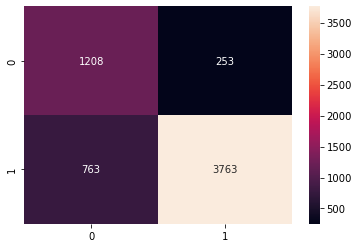

Accuracy :  0.8302989811257725
Sensitivity :  0.8268309377138946
Specificity :  0.8314184710561202
Recall score : 0.8268309377138946
F1 Score 0.7925105020633


In [40]:
prediction_test_knn = knn.predict(X_test)

C_knn = confusion_matrix(Y_test, prediction_test_knn)
sns.heatmap(C_knn, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_knn))
#####from confusion matrix calculate accuracy
accuracy1=(C_knn[0,0]+C_knn[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_knn[0,0]/(C_knn[0,0]+C_knn[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_knn[1,1]/(C_knn[1,0]+C_knn[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_knn, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_knn, average='macro')}")

In [41]:
from sklearn.svm import SVC
svm=SVC(probability=True)
svm.fit(SMOTE_X_train, SMOTE_Y_train)
print("score on test: " + str(svm.score(X_test, Y_test)))

score on test: 0.8850843494237515


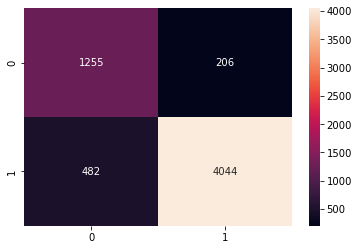

Accuracy :  0.8850843494237515
Sensitivity :  0.8590006844626967
Specificity :  0.8935041979673001
Recall score : 0.8590006844626967
F1 Score 0.8532349582664188


In [42]:
prediction_test_svm = svm.predict(X_test)

C_svm = confusion_matrix(Y_test, prediction_test_svm)
sns.heatmap(C_svm, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_svm))
#####from confusion matrix calculate accuracy
accuracy1=(C_svm[0,0]+C_svm[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_svm[0,0]/(C_svm[0,0]+C_svm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_svm[1,1]/(C_svm[1,0]+C_svm[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_svm, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_svm, average='macro')}")

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(SMOTE_X_train, SMOTE_Y_train)
print("score on test: "  + str(clf.score(X_test, Y_test)))

score on test: 0.8511775513612828


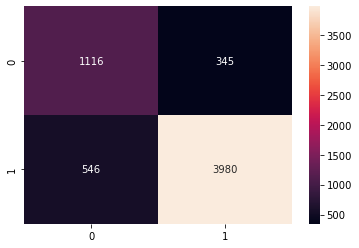

Accuracy :  0.8511775513612828
Sensitivity :  0.7638603696098563
Specificity :  0.8793636765355722
Recall score : 0.7638603696098563
F1 Score 0.8070154074972234


In [44]:
prediction_test_clf = clf.predict(X_test)

C_clf = confusion_matrix(Y_test, prediction_test_clf)
sns.heatmap(C_clf, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_clf))
#####from confusion matrix calculate accuracy
accuracy1=(C_clf[0,0]+C_clf[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_clf[0,0]/(C_clf[0,0]+C_clf[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_clf[1,1]/(C_clf[1,0]+C_clf[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_clf, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_clf, average='macro')}")

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=1.0,max_features=1.0,n_estimators=30)
bg.fit(X_train, Y_train)
print("score on test: " + str(bg.score(X_test, Y_test)))

score on test: 0.9006180056789711


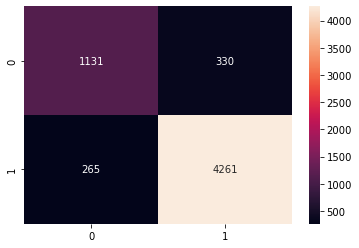

Accuracy :  0.9006180056789711
Sensitivity :  0.7741273100616016
Specificity :  0.9414494034467521
Recall score : 0.7741273100616016
F1 Score 0.8632384454585238


In [46]:
prediction_test_bg = bg.predict(X_test)

C_bg = confusion_matrix(Y_test, prediction_test_bg)
sns.heatmap(C_bg, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_bg))
#####from confusion matrix calculate accuracy
accuracy1=(C_bg[0,0]+C_bg[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_bg[0,0]/(C_bg[0,0]+C_bg[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_bg[1,1]/(C_bg[1,0]+C_bg[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_bg, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_bg, average='macro')}")

In [47]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, Y_train)
print("score on test: " + str(adb.score(X_test, Y_test)))

score on test: 0.902288291297812


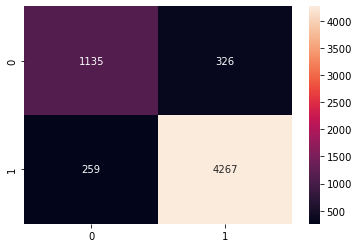

Accuracy :  0.902288291297812
Sensitivity :  0.7768651608487337
Specificity :  0.9427750773309765
Recall score : 0.7768651608487337
F1 Score 0.8654722756070782


In [48]:
prediction_test_adb = adb.predict(X_test)

C_adb = confusion_matrix(Y_test, prediction_test_adb)
sns.heatmap(C_adb, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_adb))
#####from confusion matrix calculate accuracy
accuracy1=(C_adb[0,0]+C_adb[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_adb[0,0]/(C_adb[0,0]+C_adb[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_adb[1,1]/(C_adb[1,0]+C_adb[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_adb, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_adb, average='macro')}")

In [87]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(SMOTE_X_train, SMOTE_Y_train)
print("score on test: " + str(rf.score(X_test, Y_test)))

score on test: 0.8824118924336062


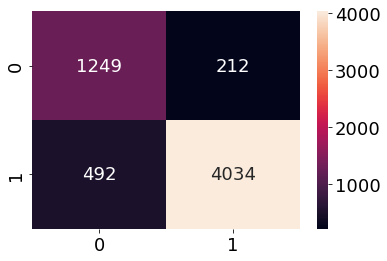

Accuracy :  0.8824118924336062
Sensitivity :  0.8548939082819986
Specificity :  0.8912947414935926
Recall score : 0.8548939082819986
F1 Score 0.8499410280795205


In [88]:
prediction_test_rf = rf.predict(X_test)

C_rf = confusion_matrix(Y_test, prediction_test_rf)
sns.heatmap(C_rf, annot=True, fmt='g')
plt.savefig("MEDINFO_cfm_RF.png")

plt.show()
total1=sum(sum(C_rf))
#####from confusion matrix calculate accuracy
accuracy1=(C_rf[0,0]+C_rf[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_rf[0,0]/(C_rf[0,0]+C_rf[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_rf[1,1]/(C_rf[1,0]+C_rf[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_rf, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_rf, average='macro')}")

In [76]:
from sklearn.ensemble import VotingClassifier
# 1) naive bias = gnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('gnb',gnb),('lr',lr),('rf',rf),('svm',svm)],voting='soft') #,voting='hard'
evc.fit(X_train, Y_train)
print("score on test: " + str(evc.score(X_test, Y_test)))

score on test: 0.894270920327376


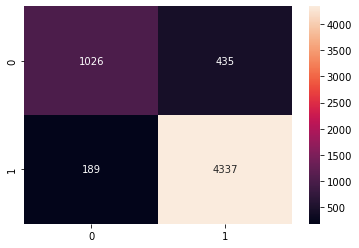

Accuracy :  0.8957741773843327
Sensitivity :  0.702258726899384
Specificity :  0.9582412726469288
Recall score : 0.702258726899384
F1 Score 0.8498524683933186


In [52]:
prediction_test_evc = evc.predict(X_test)

C_evc = confusion_matrix(Y_test, prediction_test_evc)
sns.heatmap(C_evc, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_evc))
#####from confusion matrix calculate accuracy
accuracy1=(C_evc[0,0]+C_evc[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_evc[0,0]/(C_evc[0,0]+C_evc[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_evc[1,1]/(C_evc[1,0]+C_evc[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_evc, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_evc, average='macro')}")

In [35]:
X_train.shape

(22645, 23)

In [53]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, hidden_layer_sizes=150)
mlp.fit(X_train, Y_train)
print("score on test: " + str(mlp.score(X_test, Y_test)))

score on test: 0.8997828628695507


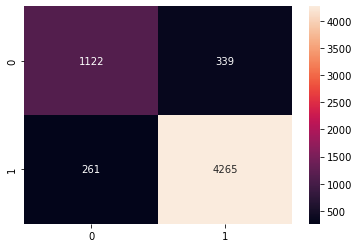

Accuracy :  0.8997828628695507
Sensitivity :  0.7679671457905544
Specificity :  0.9423331860362351
Recall score : 0.7679671457905544
F1 Score 0.8616560603749867


In [54]:
prediction_test_mlp = mlp.predict(X_test)

C_mlp = confusion_matrix(Y_test, prediction_test_mlp)
sns.heatmap(C_mlp, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_mlp))
#####from confusion matrix calculate accuracy
accuracy1=(C_mlp[0,0]+C_mlp[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_mlp[0,0]/(C_mlp[0,0]+C_mlp[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_mlp[1,1]/(C_mlp[1,0]+C_mlp[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_mlp, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_mlp, average='macro')}")

In [79]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(SMOTE_X_train, SMOTE_Y_train)
print("score on test: " + str(xgb_model.score(X_test, Y_test)))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[10:50:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score on test: 0.9179889761149157


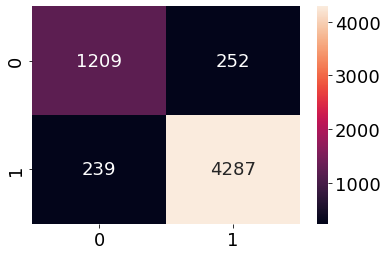

Accuracy :  0.9179889761149157
Sensitivity :  0.8275154004106776
Specificity :  0.9471939902783915
Recall score : 0.8275154004106776
F1 Score 0.888524553485512


In [80]:
prediction_test_xgb = xgb_model.predict(X_test)

C_xgb = confusion_matrix(Y_test, prediction_test_xgb)
sns.heatmap(C_xgb, annot=True, fmt='g')
plt.show()

total1=sum(sum(C_xgb))
#####from confusion matrix calculate accuracy
accuracy1=(C_xgb[0,0]+C_xgb[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = C_xgb[0,0]/(C_xgb[0,0]+C_xgb[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = C_xgb[1,1]/(C_xgb[1,0]+C_xgb[1,1])
print('Specificity : ', specificity1)

print('Recall score :', recall_score(Y_test, prediction_test_xgb, pos_label=0))
print(f"F1 Score {f1_score(Y_test, prediction_test_xgb, average='macro')}")

In [208]:
plt.savefig("xcfm4.png")

<Figure size 432x288 with 0 Axes>

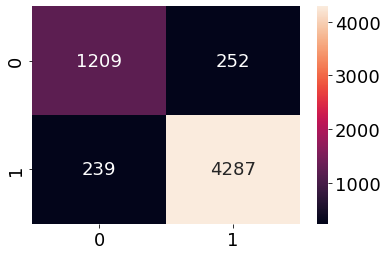

In [81]:

C_xgb = confusion_matrix(Y_test, prediction_test_xgb)
sns.heatmap(C_xgb, annot=True, fmt='g')
plt.savefig("MEDINFO_xgb_cfm.png")
plt.show()


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


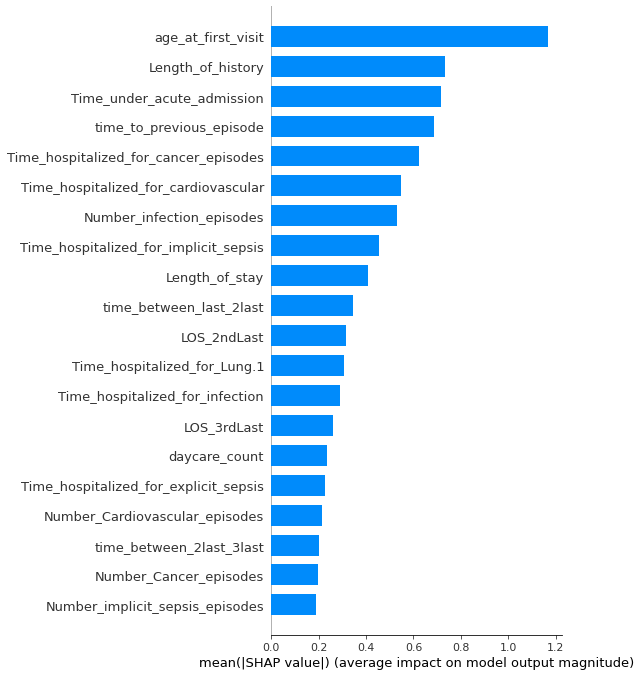

In [59]:
shap_values = shap.TreeExplainer(xgb_model).shap_values(SMOTE_X_train)
shap.summary_plot(shap_values, SMOTE_X_train, plot_type="bar", feature_names=feature_names)

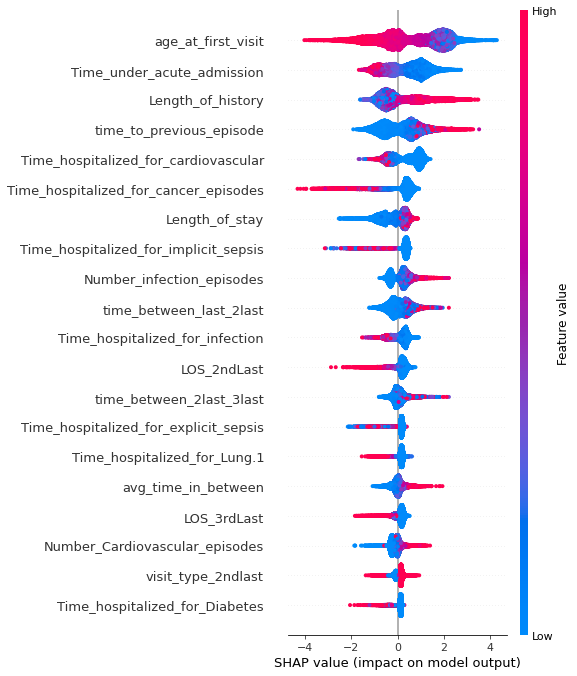

In [60]:
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="dot", feature_names=feature_names)

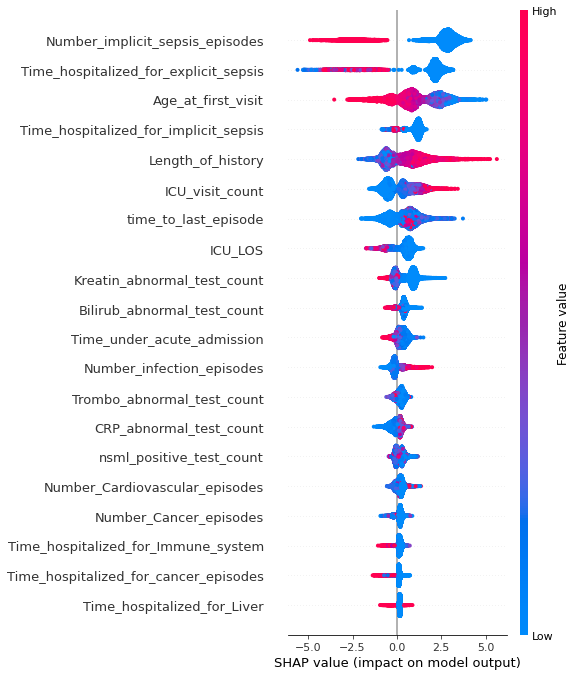

In [78]:
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="dot", feature_names=feature_names)

 99%|===================| 23760/23944 [00:54<00:00]        

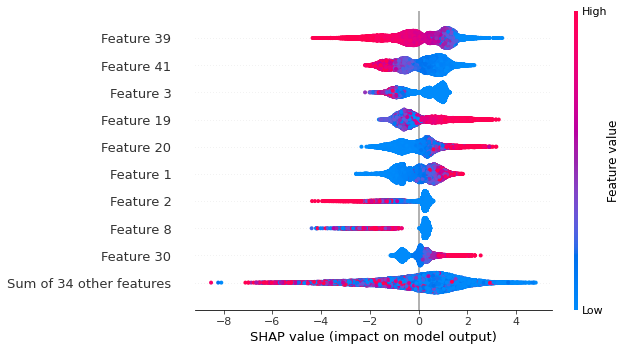

In [61]:
explainer_xgb = shap.Explainer(xgb_model, X_train)
shap_values3 = explainer_xgb(X_train)
shap.plots.beeswarm(shap_values3)

 96%|=================== | 5725/5987 [00:13<00:00]       

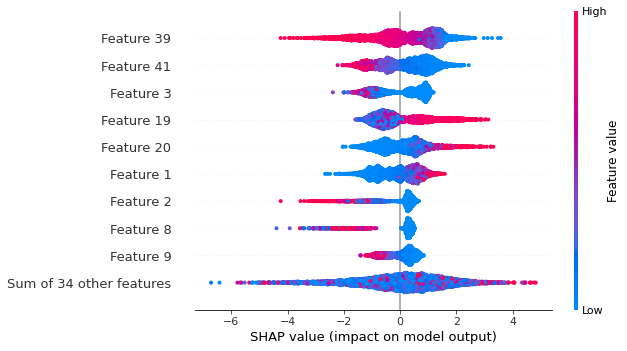

In [62]:
explainer_xgb_t = shap.Explainer(xgb_model, X_test)
shap_values4 = explainer_xgb_t(X_test)
shap.plots.beeswarm(shap_values4)

In [63]:
lr_pred = lr.predict(X_test)
gnb_pred = gnb.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
clf_pred = clf.predict(X_test)
bg_pred = bg.predict(X_test)
adb_pred = adb.predict(X_test)
rf_pred = rf.predict(X_test)
evc_pred = evc.predict(X_test)
mlp_pred = mlp.predict(X_test)

In [64]:
print(f"F1 Score {f1_score(Y_test, lr_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, gnb_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, knn_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, svm_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, clf_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, bg_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, adb_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, rf_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, evc_pred, average='macro')}")
print(f"F1 Score {f1_score(Y_test, mlp_pred, average='macro')}")

F1 Score 0.8518444829825311
F1 Score 0.760026614719864
F1 Score 0.7925105020633
F1 Score 0.8532349582664188
F1 Score 0.8070154074972234
F1 Score 0.8632384454585238
F1 Score 0.8654722756070782
F1 Score 0.8520801079400426
F1 Score 0.8498524683933186
F1 Score 0.8616560603749867


In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
lr_auc = roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])
gnb_auc = roc_auc_score(Y_test, gnb.predict_proba(X_test)[:, 1])
knn_auc = roc_auc_score(Y_test, knn.predict_proba(X_test)[:, 1])
svm_auc = roc_auc_score(Y_test, svm.predict_proba(X_test)[:, 1])
clf_auc = roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1])
bg_auc = roc_auc_score(Y_test, bg.predict_proba(X_test)[:, 1])
adb_auc = roc_auc_score(Y_test, adb.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])
evc_auc = roc_auc_score(Y_test, evc.predict_proba(X_test)[:, 1])
mlp_auc = roc_auc_score(Y_test, mlp.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(Y_test, xgb_model.predict_proba(X_test)[:, 1])

Calculate ROC curve

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [68]:
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr.predict_proba(X_test)[:, 1])
gnb_fpr, gnb_tpr, _ = roc_curve(Y_test, gnb.predict_proba(X_test)[:, 1])
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn.predict_proba(X_test)[:, 1])
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm.predict_proba(X_test)[:, 1])
clf_fpr, clf_tpr, _ = roc_curve(Y_test, clf.predict_proba(X_test)[:, 1])
bg_fpr, bg_tpr, _ = roc_curve(Y_test, bg.predict_proba(X_test)[:, 1])
adb_fpr, adb_tpr, _ = roc_curve(Y_test, adb.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
evc_fpr, evc_tpr, _ = roc_curve(Y_test, evc.predict_proba(X_test)[:, 1])
mlp_fpr, mlp_tpr, _ = roc_curve(Y_test, mlp.predict_proba(X_test)[:, 1])
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, xgb_model.predict_proba(X_test)[:, 1])

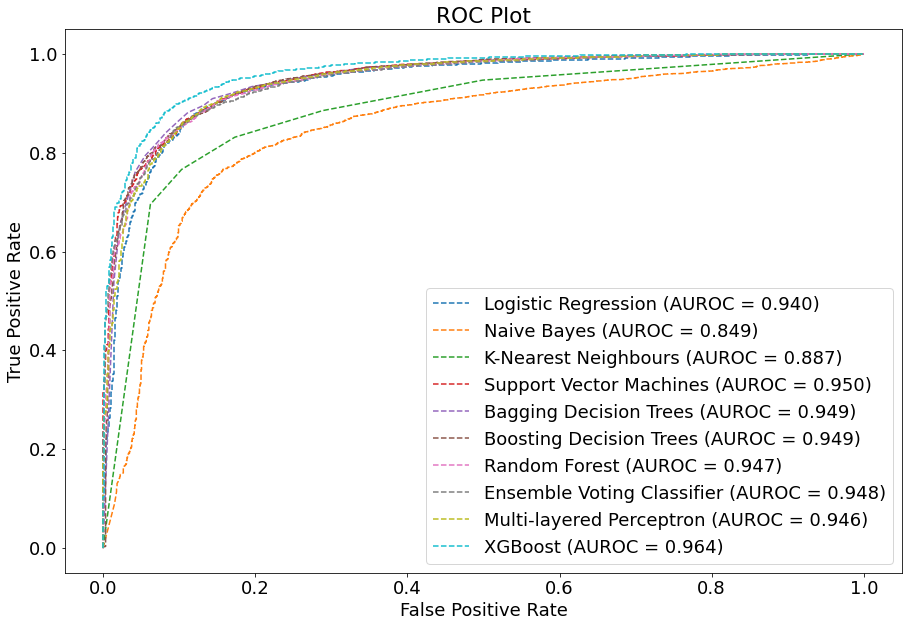

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.plot(gnb_fpr, gnb_tpr, linestyle='--', label='Naive Bayes (AUROC = %0.3f)' %gnb_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K-Nearest Neighbours (AUROC = %0.3f)' %knn_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machines (AUROC = %0.3f)' %svm_auc)
#plt.plot(clf_fpr, clf_tpr, linestyle='--', label='Decision Trees (AUROC = %0.3f)' %clf_auc)
plt.plot(bg_fpr, bg_tpr, linestyle='--', label='Bagging Decision Trees (AUROC = %0.3f)' %bg_auc)
plt.plot(adb_fpr, adb_tpr, linestyle='--', label='Boosting Decision Trees (AUROC = %0.3f)' %adb_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUROC = %0.3f)' %rf_auc)
plt.plot(evc_fpr, evc_tpr, linestyle='--', label='Ensemble Voting Classifier (AUROC = %0.3f)' %evc_auc)
plt.plot(mlp_fpr, mlp_tpr, linestyle='--', label='Multi-layered Perceptron (AUROC = %0.3f)' %mlp_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGBoost (AUROC = %0.3f)' %xgb_auc)
plt.rcParams['font.size'] = 18

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.rc('legend', fontsize=18)
plt.legend()
plt.savefig("MEDINFO_roc.png")
plt.show()


In [70]:
plt.savefig("MEDINFO_roc.png")

<Figure size 432x288 with 0 Axes>

LightGBM

In [68]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)

In [85]:
params = {'learning_rate':0.05, 'boosting_type':'dart',    #Try dart for better accuracy gbdt
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'max_depth':30,
              'num_leaves':100}

In [86]:
lgb_clf=lgb.train(params,d_train,100)

[LightGBM] [Info] Number of positive: 17029, number of negative: 5616
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3958
[LightGBM] [Info] Number of data points in the train set: 22645, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.751998 -> initscore=1.109298
[LightGBM] [Info] Start training from score 1.109298


In [87]:
y_pred_1=lgb_clf.predict(X_test)

In [90]:
metrics.accuracy_score(y_pred_1, Y_test)

0.2516778523489933

In [89]:
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [91]:
precision_score(y_pred_1,Y_test,average=None).mean()

0.5

<AxesSubplot:>

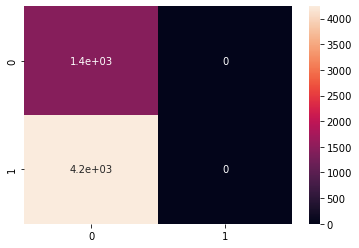

In [74]:
cm_lgbm = confusion_matrix(Y_test, y_pred_1)
sns.heatmap(cm_lgbm, annot=True)